In [2]:
import duckdb
con = duckdb.connect('../data/staging/warehouse.duckdb')

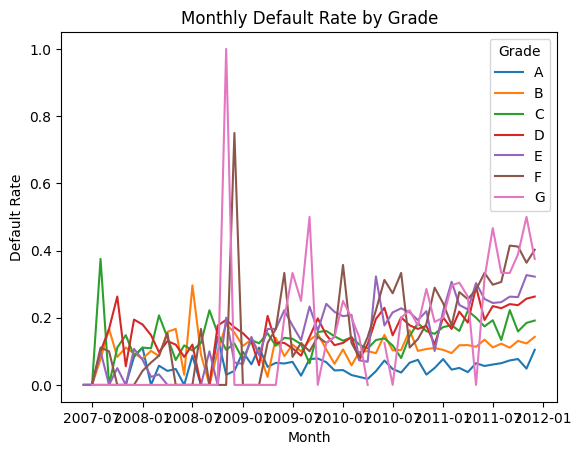

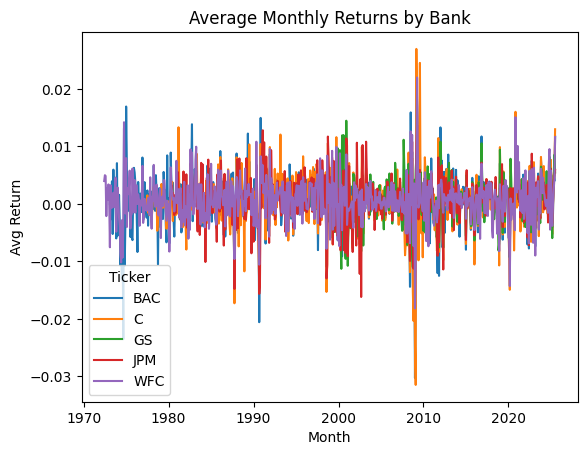

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pull credit mart
df_credit = con.execute("""
    SELECT month, grade, default_rate
    FROM mart_credit_metrics
""").df()
pivot_credit = df_credit.pivot(index='month', columns='grade', values='default_rate')

plt.figure()
for grade in pivot_credit.columns:
    plt.plot(pivot_credit.index, pivot_credit[grade], label=grade)
plt.title('Monthly Default Rate by Grade')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.legend(title='Grade')
plt.show()

# 2. Pull market mart
df_market = con.execute("""
    SELECT month, ticker, avg_return
    FROM mart_market_metrics
""").df()
pivot_market = df_market.pivot(index='month', columns='ticker', values='avg_return')

plt.figure()
for ticker in pivot_market.columns:
    plt.plot(pivot_market.index, pivot_market[ticker], label=ticker)
plt.title('Average Monthly Returns by Bank')
plt.xlabel('Month')
plt.ylabel('Avg Return')
plt.legend(title='Ticker')
plt.show()
